# Statistics 2
_Renaissance EXL_  
_Renaissance Learning, 2022_  
  
With some basic data visualization and statistics calculated, you're now ready to tackle some more advanced statistics for your analysis.

## Today's Session

1. Housekeeping  
    - 3 Week Check In - Results 
    
2. Statistics II
    - Central tendency (redux)
    - `groupby` objects and methods
    - Trend fitting
    - Correlation
    - Faceted scatterplots and correlation matrices  
  
3. Wrap up

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle
import seaborn as sns

# local imports
from utils import cast_to_number

## Housekeeping

### 3 Week Check In - Results

Response Rate: 4/6

In [2]:
plt.rcParams['axes.axisbelow'] = True    # global grid setting

filepath = '../data/feedback/3_week_check_in_responses.csv'
responses = pd.read_csv(filepath, usecols=range(1,6))

def bar_plot_for_question(data: DataFrame, 
        question_number: int) -> None:
    """Generates and shows a bar plot for survey question
    """
    
    # select the data
    c = data.columns[question_number - 1]
    scores = range(1, 6)
    counts = [len(data[data[c] == score]) for score in scores]
    
    # draw the plot
    plt.figure(figsize=(12, 8))
    plt.bar(scores, counts, color ='green', width=0.8)
    
    # display settings
    plt.title(c, fontsize=16)
    plt.xlabel("level of agreement", fontsize=12)
    plt.ylabel("n responses", fontsize=12)
    plt.ylim(0, 4)
    plt.yticks(range(0, 5))
    plt.grid(axis='y')
    
    plt.show()

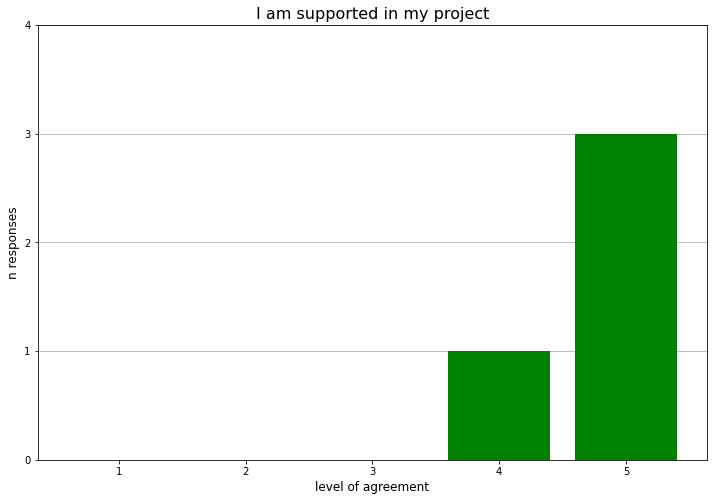

In [3]:
bar_plot_for_question(responses, 1)

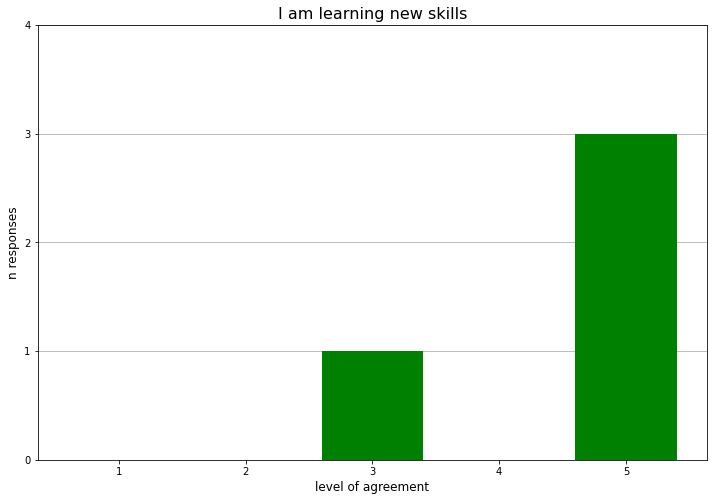

In [4]:
bar_plot_for_question(responses, 2)

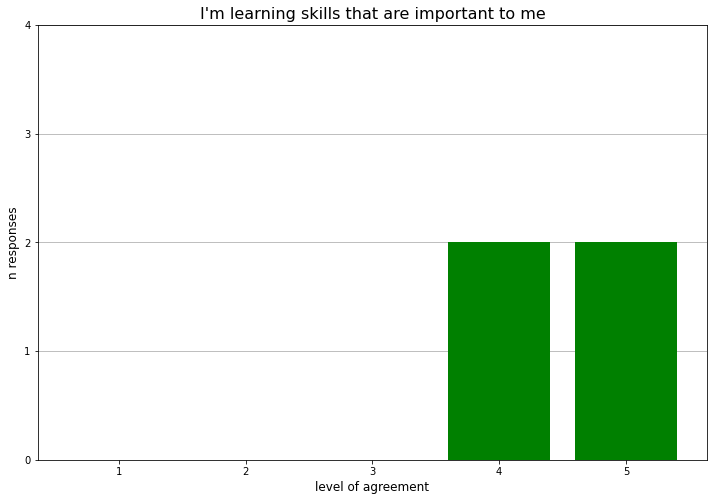

In [5]:
bar_plot_for_question(responses, 3)

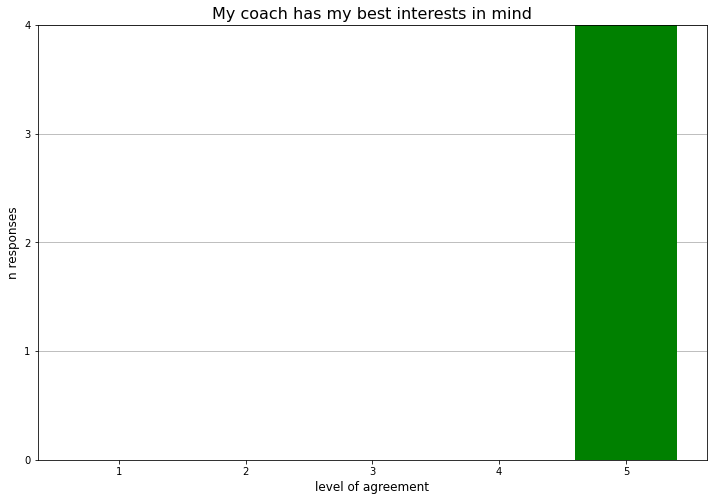

In [6]:
bar_plot_for_question(responses, 4)

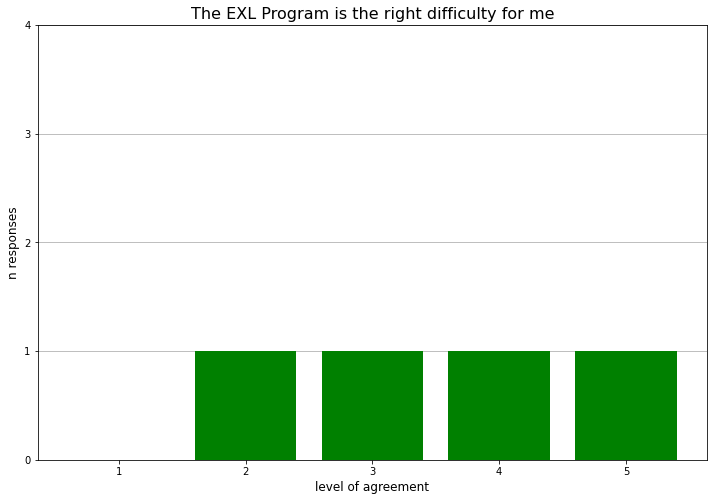

In [7]:
bar_plot_for_question(responses, 5)

### How we're thinking about these results

- We're really glad that you're feeling supported and that your coaches are working for you.

- We have more work to do to make sure the program feels really relevant and personalized for you. 

- As coaches, we'll talk about this with each of you over the next week to find out how we can adjust the lessons and/or your projects to make sure you're learning at a rate that feels right for you.

## Statistics 2

### Discuss with a partner (4 minutes)...

How do you know if a pattern in data is **meaningful**?

In [8]:
def make_random_groups(names: list, group_size: int) -> list:
    """Splits list of names into random groups
    """
    if len(names) % group_size != 0:
        group_size = group_size + 1
    
    shuffle(names)
    groups = [names[i:i+group_size] for i in range(0, len(names), group_size)]
    for i, g in enumerate(groups):
        print(f'\nGroup {i+1}\n--------')
        for n in g:
            print(f'- {n}')
    return groups
        
names = ['Aiden', 'Hassan', 'Srikar', 'Vianney']
groups = make_random_groups(names, 2)


Group 1
--------
- Srikar
- Vianney

Group 2
--------
- Aiden
- Hassan


### Variance and standard deviation

- The term **normal distribution** describes the a specific spread (distribution) of data
![normal distribution](../images/normal_distribution.png)

- Normal distributions of data appear in many places, as a result of measurement error and differences between data points

- The normal distribution is also known as
    - Poisson distribution
    - Gaussian / Gauss distrubution
    - Bell curve

![normal distribution](../images/normal_distribution.png)

Normal distributions are described by two parameters:

- **mean ($\mu$):** the *center* of the distribution

- **standard deviation ($\sigma$):** the *width* of the distribution

Let's generate some data that follows a normal distribution...  
```python
np.random.normal(mean, std_dev, n_samples)
```

[125.  86. 106. 100. 104. 122. 100. 107. 109. 102. 103.  98. 104. 107.
 103.  88. 100.  87. 104.  95.]


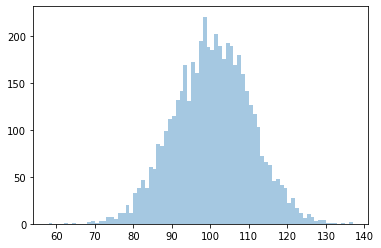

In [10]:
mean = 100
std_dev = 10

s1 = np.rint(np.random.normal(mean, std_dev, 5000))
b1 = int(s1.max() - s1.min())
print(s1[:20])

plt.hist(x=s1, bins=b1, alpha=0.4);

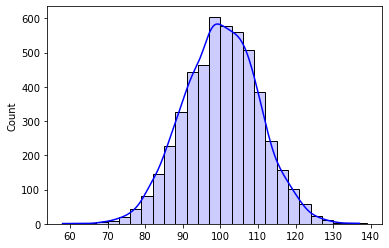

In [11]:
sns.histplot(s1, bins=b1, color='blue', binwidth=3, alpha=0.2, kde=True);

[ 81.  86.  99. 109.  95. 107. 106.  95. 101. 112. 112. 103. 105.  92.
 108. 107. 106. 106.  86. 109.]


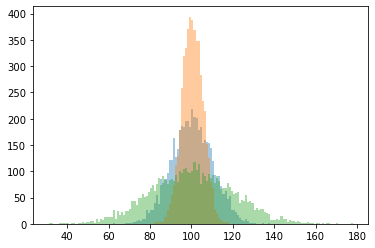

In [12]:
s1 = np.rint(np.random.normal(100, 10, 5000))
b1 = int(s1.max() - s1.min())
print(s1[:20])

s2 = np.rint(np.random.normal(100, 5, 5000))
b2 = int(s2.max() - s2.min())

s3 = np.rint(np.random.normal(100, 20, 5000))
b3 = int(s3.max() - s3.min())

plt.hist(x=s1, bins=b1, alpha=0.4);
plt.hist(x=s2, bins=b2, alpha=0.4);
plt.hist(x=s3, bins=b3, alpha=0.4);

Calculate standard deviation

In [13]:
print(f'{np.std(s1):.3}')
print(f'{np.std(s2):.3}')
print(f'{np.std(s3):.3}')

9.86
5.02
19.8


### `groupby` functions

`pd.DataFrame.groupby` creates way to apply calculations on specific groups within your data.  
Let's use `groupby` with the iris dataset.

In [14]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(csv_url, names = col_names)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


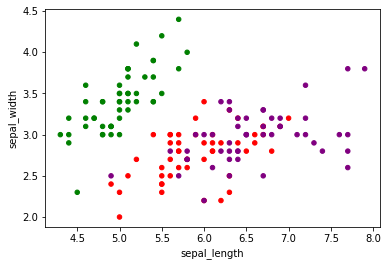

In [15]:
# assign each species to a different color
color_map = {
    'Iris-setosa': 'green',
    'Iris-versicolor': 'red',
    'Iris-virginica': 'purple',
}
colors = [color_map[s] for s in iris['species']]

iris.plot.scatter(x='sepal_length', y='sepal_width', color=colors);

Create a pandas `groupby` object

In [16]:
gb_species = iris.groupby('species')
gb_species

In [17]:
gb_species.size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [18]:
gb_species.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
gb_species.std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


Many other methods can be applied to a `groupby` object

### Trend-fitting

#### Linear fit
What is the equation for a straight line?

$y = mx + b$

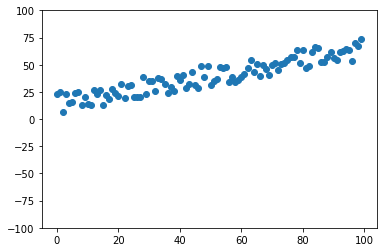

In [20]:
x = np.arange(100)

m = 0.5
b = 15

# assign y values as a linear function, and add some random noise
# uniform distributions are flat, compared to the bell-shaped normal distribution
noise = np.random.uniform(-10, 10, size=100)   
    
y =  m*x + b + noise

plt.scatter(x, y)
plt.ylim(-100, 100)
plt.show()

Enter `numpy.polyfit()` and `numpy.poly1d()`...

- `numpy.polyfit()` - determines the parameters of a polynomial function (m, b)
- `numpy.poly1d()` - takes these parameters and creates a new function with them

In [21]:
linear_model = np.polyfit(x, y, 1)
linear_model

array([ 0.50193736, 14.48219911])

Notice how these are close to our original values of $m = 0.5$ and $b = 15$

In [22]:
linear_model_fn = np.poly1d(linear_model)
linear_model_fn

poly1d([ 0.50193736, 14.48219911])

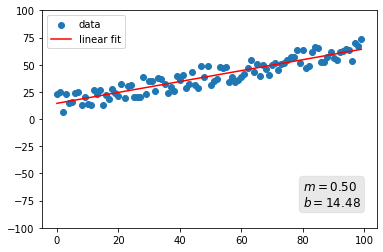

In [23]:
# draw the data
plt.scatter(x, y, label='data')

# add the linear fit line    # plt.plot draws a straight line connecting the points
plt.plot(x, linear_model_fn(x), color="red", label='linear fit')

# add text box for the statistics
stats = (f'$m = {linear_model[0]:.2f}$\n'
         f'$b = {linear_model[1]:.2f}$')
bbox = dict(boxstyle='round', fc='lightgrey', ec='lightgrey', alpha=0.5)
plt.text(80, -80, stats, fontsize=12, bbox=bbox, horizontalalignment='left')

plt.ylim(-100, 100)
plt.legend()
plt.show()

#### Polynomial fit

Standard form of a quadratic function:
$y = ax^2 + by + c$

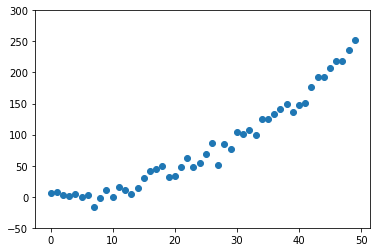

In [24]:
x = np.arange(50)
a = 0.1
b = -0.005
c = 1.0

noise = np.random.normal(0, 10, size=50)
y =  a*x**2 + b*x + c + noise

plt.scatter(x, y)
plt.ylim(-50, 300)
plt.show()

Fit the data

In [25]:
# polynomial fit
poly_model = np.polyfit(x, y, 2)
poly_model_fn = np.poly1d(poly_model)

# linear fit (for comparison)
linear_model = np.polyfit(x, y, 1)
linear_model_fn = np.poly1d(linear_model)

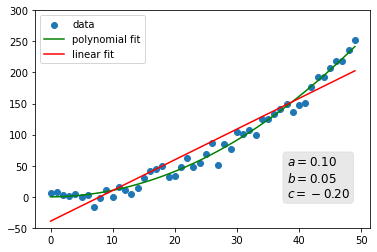

In [26]:
# draw the data
plt.scatter(x, y, label='data')

# add the polynomial fit line
plt.plot(x, poly_model_fn(x), color="green", label='polynomial fit')

# add the linear fit line
plt.plot(x, linear_model_fn(x), color="red", label='linear fit')

# add text box for the statistics
stats = (f'$a = {poly_model[0]:.2f}$\n'
         f'$b = {poly_model[1]:.2f}$\n'
         f'$c = {poly_model[2]:.2f}$')
bbox = dict(boxstyle='round', fc='lightgrey', ec='lightgrey', alpha=0.5)
plt.text(38, 0, stats, fontsize=12, bbox=bbox, horizontalalignment='left')

plt.ylim(-50, 300)
plt.legend()
plt.show()

### Correlation
- $r$
- $r^2$

In [27]:
x = np.arange(100)
def linear_fn(x, m, b, noise_std_dev):
    """produces y values for a specified linear equation
    """
    noise = np.random.uniform(-1 * noise_std_dev, noise_std_dev, size=len(x))
    return  m*x + b + noise

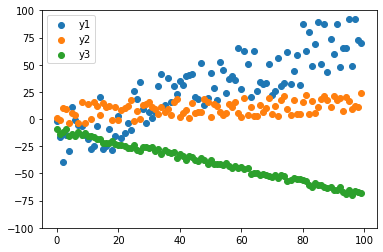

In [28]:
y1 = linear_fn(x,    1, -20, 28)
y2 = linear_fn(x,  0.1,   5, 10)
y3 = linear_fn(x, -0.6, -10,  3)

plt.scatter(x, y1, label='y1')
plt.scatter(x, y2, label='y2')
plt.scatter(x, y3, label='y3')

plt.ylim(-100, 100)
plt.legend()
plt.show()

Rank the three series from strongest relationship to weakest relationship.

**Correlation:** a measure of the strength of the linear relationship between two variables

* -1 indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1 indicates a perfectly positive linear correlation between two variables

> (from [Statology.org/correlation-in-python/](https://www.statology.org/correlation-in-python/))

Calculating a correlation ($r$)

In [29]:
# calculates the r value for (x, x), (x, y), (y, x), (y, y), and returns an array

np.corrcoef(x, y1)

array([[1.        , 0.86656668],
       [0.86656668, 1.        ]])

Because 
- corr(x, y) = corr(y, x), and  
- corr(x, x) = corr(y, y) = 1

we are only concerned with one of these values. We can select it by getting the first column, and the second row


In [30]:
np.corrcoef(x, y1)[0,1]

0.8665666830601972

Why does `[0, 1]` select the first column and second row?

In [31]:
print(f'corr(x, y1) = {np.corrcoef(x, y1)[0,1]:.2}')
print(f'corr(x, y2) = {np.corrcoef(x, y2)[0,1]:.2}')
print(f'corr(x, y3) = {np.corrcoef(x, y3)[0,1]:.2}')

corr(x, y1) = 0.87
corr(x, y2) = 0.41
corr(x, y3) = -1.0


note: `:.2` tells the print formatter to round the value to two decimal places when it is displayed

###  Faceted Scatterplots and Correlation Matrices

Load the world population dataset

In [32]:
population = pd.read_csv('../data/world-population-by-country-2020.csv')
population = population.replace('N.A.', np.nan)
for c in population.columns:
    try:
        population[c] = population[c].apply(cast_to_number)
    except:
        pass
population

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,2,India,1.380004e+09,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,3,United States,3.310027e+08,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,4,Indonesia,2.735236e+08,1.07,2898047.0,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,5,Pakistan,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4.992000e+03,0.06,3.0,50.0,100.0,NaN,NaN,NaN,10.0,0.00
231,232,Falkland Islands,3.480000e+03,3.05,103.0,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
232,233,Niue,1.626000e+03,0.68,11.0,6.0,260.0,NaN,NaN,NaN,46.0,0.00
233,234,Tokelau,1.357000e+03,1.27,17.0,136.0,10.0,NaN,NaN,NaN,0.0,0.00


#### Scatterplot Matrix

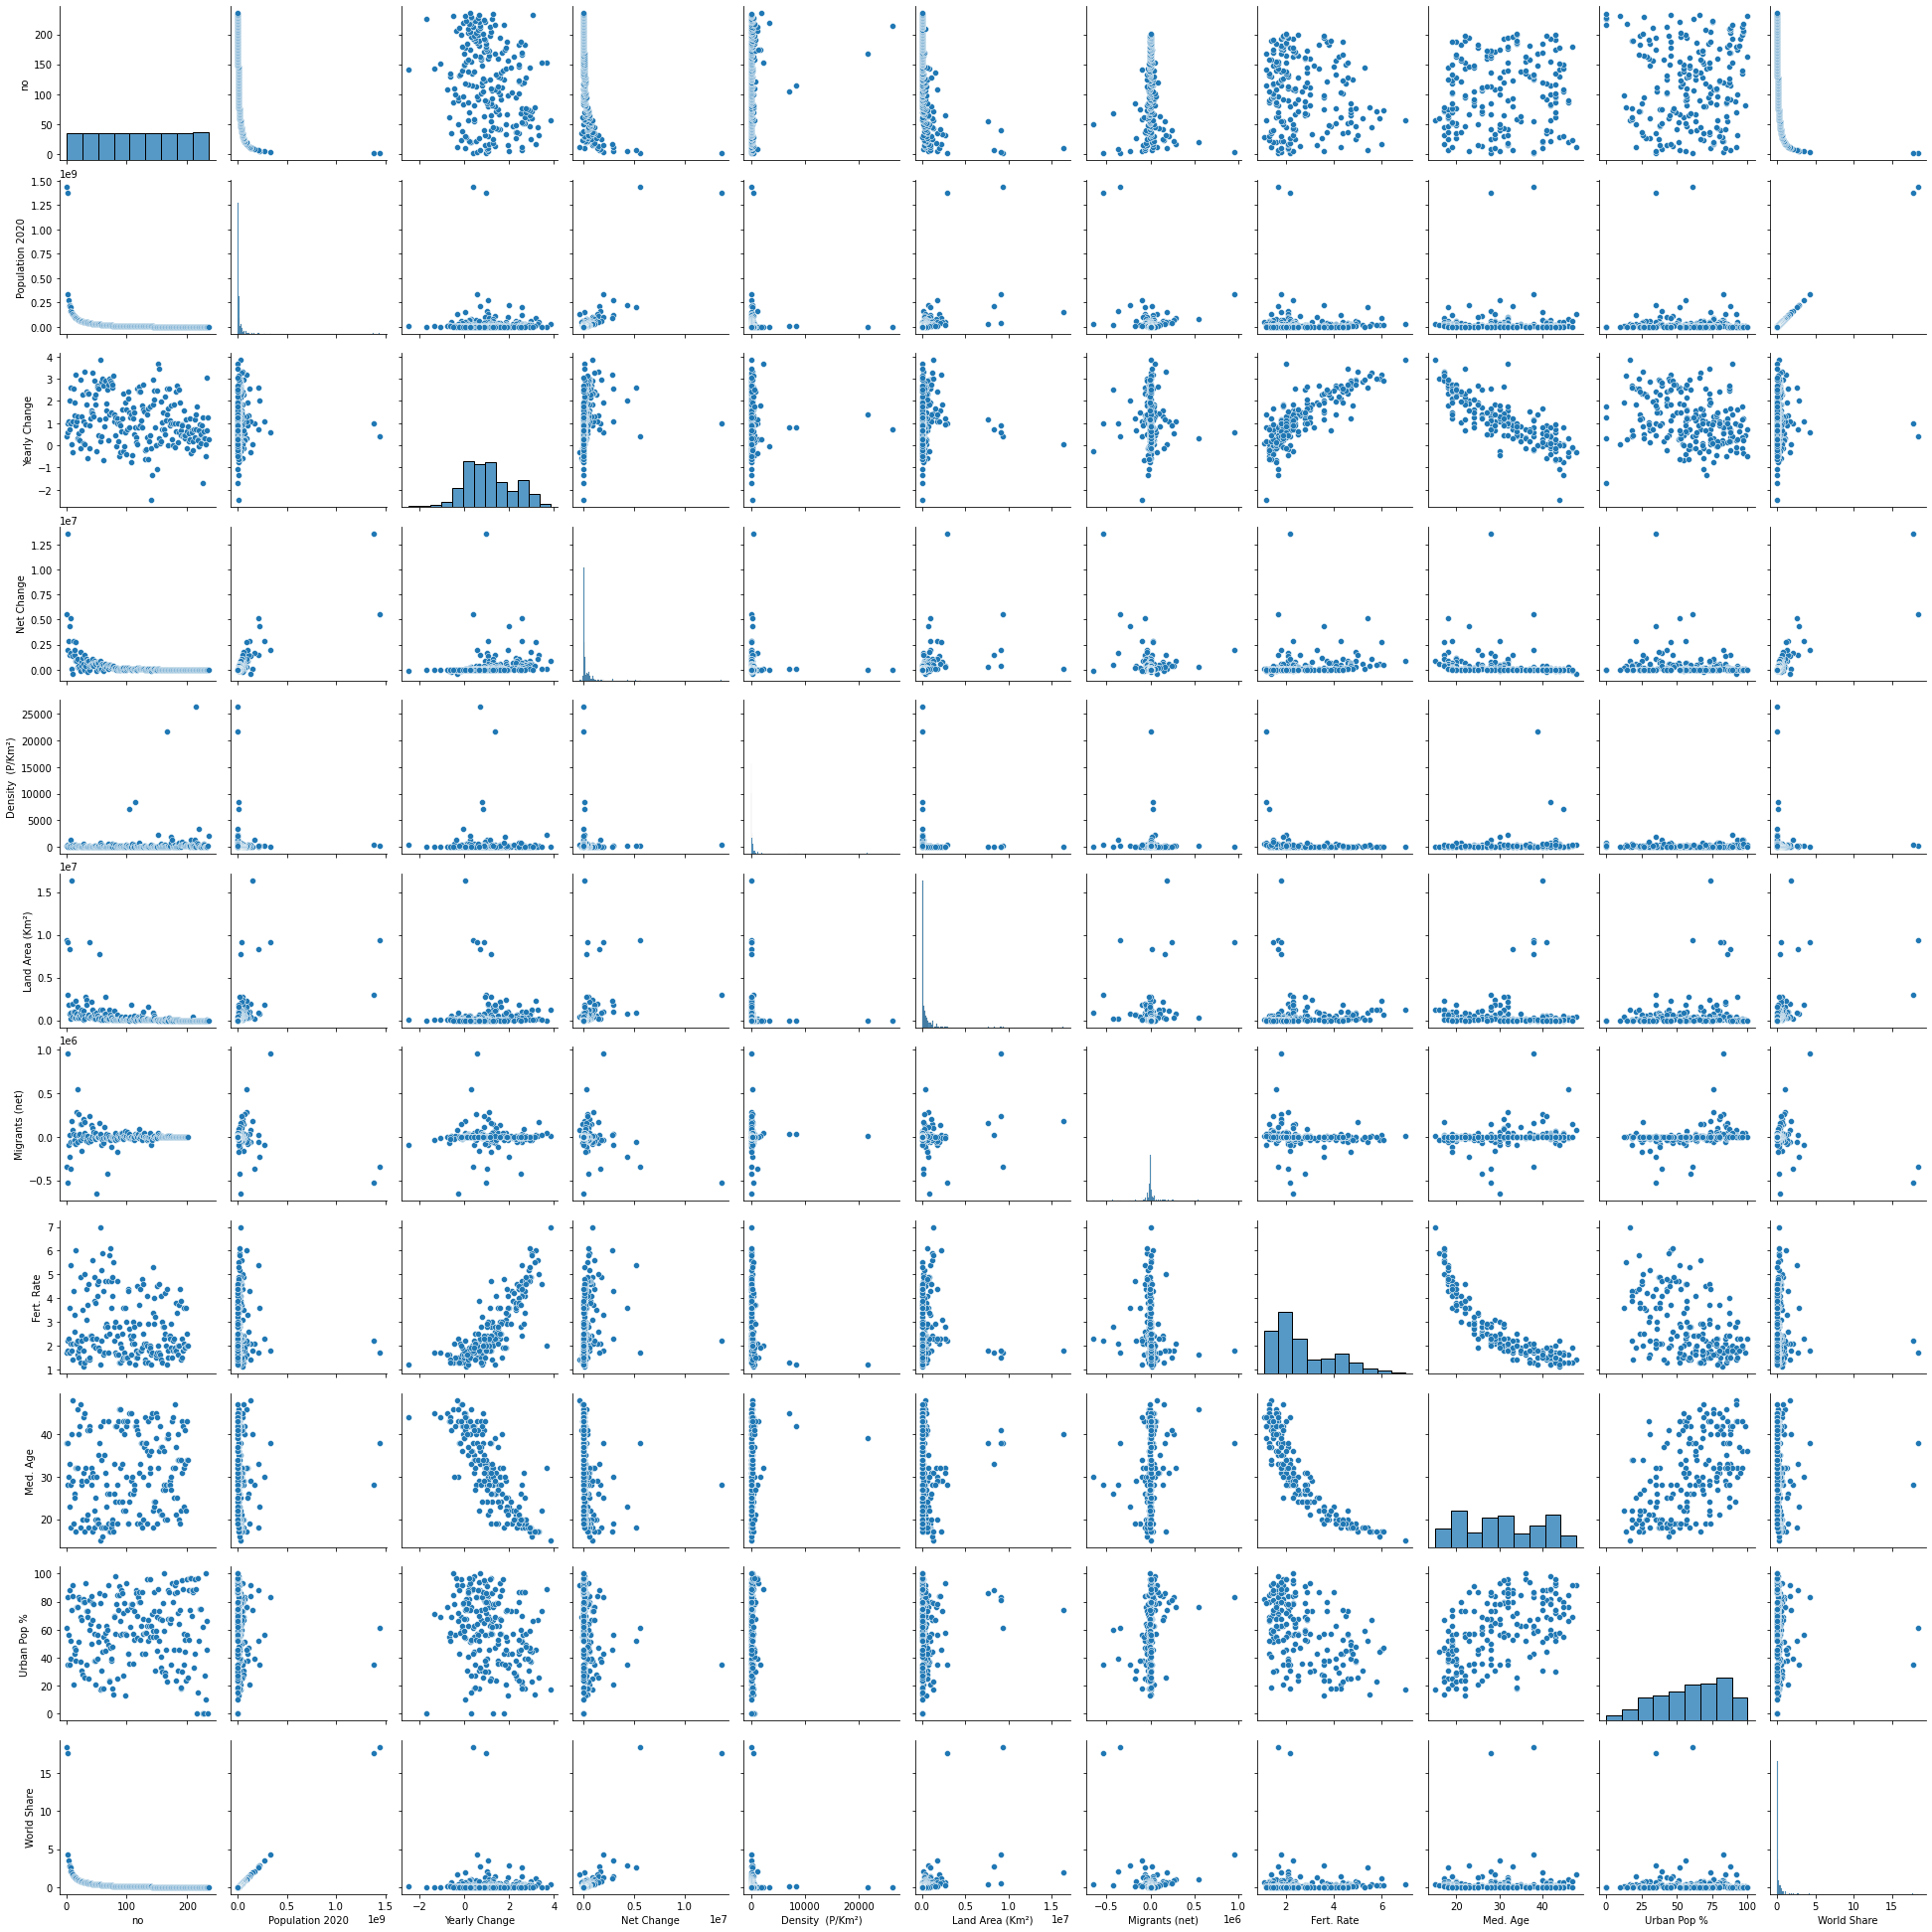

In [33]:
sns.pairplot(population);

#### Correlation matrix

In [34]:
matrix = population.corr()
matrix

,no,Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
no,1.000000,-0.353939,-0.237580,-0.420718,0.126631,-0.391029,-0.025443,-0.136316,0.108443,0.001627,-0.354029
Population 2020,-0.353939,1.000000,-0.009714,0.851950,-0.025694,0.455600,-0.267104,-0.048964,0.018756,-0.037013,0.999999
Yearly Change,-0.237580,-0.009714,1.000000,0.190156,-0.027043,0.009176,-0.016140,0.823845,-0.843301,-0.275673,-0.009679
Net Change,-0.420718,0.851950,0.190156,1.000000,-0.034149,0.305664,-0.302158,0.166476,-0.192737,-0.147177,0.851806
Density (P/Km²),0.126631,-0.025694,-0.027043,-0.034149,1.000000,-0.059138,0.000122,-0.151806,0.141109,0.038468,-0.025587
Land Area (Km²),-0.391029,0.455600,0.009176,0.305664,-0.059138,1.000000,0.225448,-0.045421,0.062340,0.113637,0.455620
Migrants (net),-0.025443,-0.267104,-0.016140,-0.302158,0.000122,0.225448,1.000000,-0.113283,0.190539,0.270934,-0.266888
Fert. Rate,-0.136316,-0.048964,0.823845,0.166476,-0.151806,-0.045421,-0.113283,1.000000,-0.882396,-0.485951,-0.049104
Med. Age,0.108443,0.018756,-0.843301,-0.192737,0.141109,0.062340,0.190539,-0.882396,1.000000,0.534106,0.018851
Urban Pop %,0.001627,-0.037013,-0.275673,-0.147177,0.038468,0.113637,0.270934,-0.485951,0.534106,1.000000,-0.036859


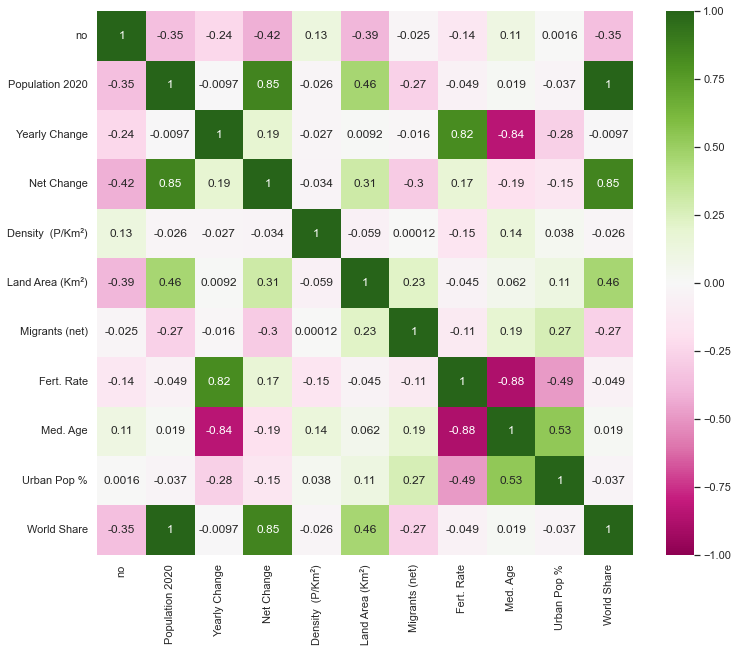

In [38]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='PiYG')
#sns.heatmap(matrix, annot=True, cmap='PiYG')
plt.show()

Same data, different diverging color palette: `coolwarm`

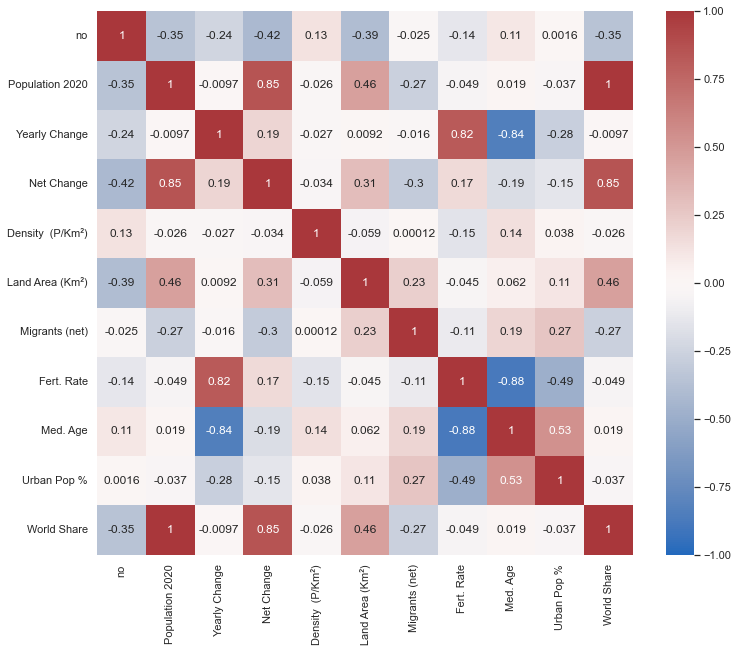

In [40]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

For more color palettes, see the [Seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Wrap Up

Name 1 thing you learned today:

In [41]:
import random
names = ['Aiden', 'Hassan', 'Srikar', 'Vianney']
random.shuffle(names)
for i, n in enumerate(names):
    print(f'{i+1}. {n}')

1. Aiden
2. Vianney
3. Srikar
4. Hassan


### Todos

1. Apply these statistical methods to your research

2. Post an update on your research project in the `#research` channel

3. Post a screenshot of your statistical analysis in the `#python` channel

4. Reply to at least 2 others' postings
    - A question about the project
    - A suggestion
    - Anything else you want to say!

5. Begin expanding your research paper's outline into a full paper.